In [20]:
%reset -f
import os
# os._exit(00)
import xgboost
import shap
from wavhandler import Dataset, transform_data
import pandas as pd

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
data = Dataset('LG')
data.load(only_names=False, nr_signals=2000)
X = transform_data(data.X)
y = data.y

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
ros.fit(X,y)
X, y = ros.fit_resample(X,y)
print('After undersampling: \n{}\n'.format(pd.DataFrame(y).iloc[:,0].value_counts()))

print(X.shape, y.shape)

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


100%|██████████| 4098/4098 [00:02<00:00, 1908.80it/s]

After undersampling: 
1    2036
0    2036
Name: 0, dtype: int64

(4072, 129) (4072,)


In [21]:
X,y = pd.DataFrame(X), y#shap.datasets.boston()
model = xgboost.train({"n_estimators": 325, "n_jobs":-1}, xgboost.DMatrix(X, label=y), 100)

In [22]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [23]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

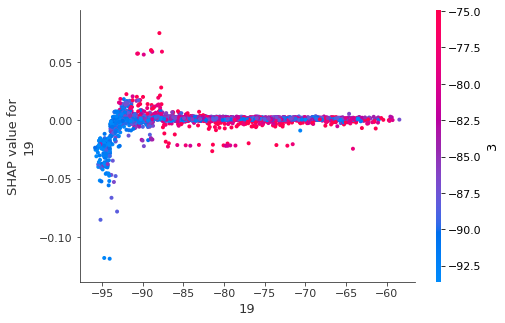

In [29]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot(19, shap_values, X)

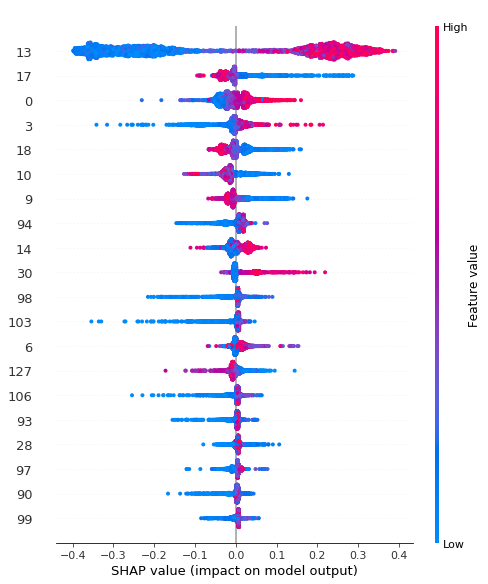

In [30]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

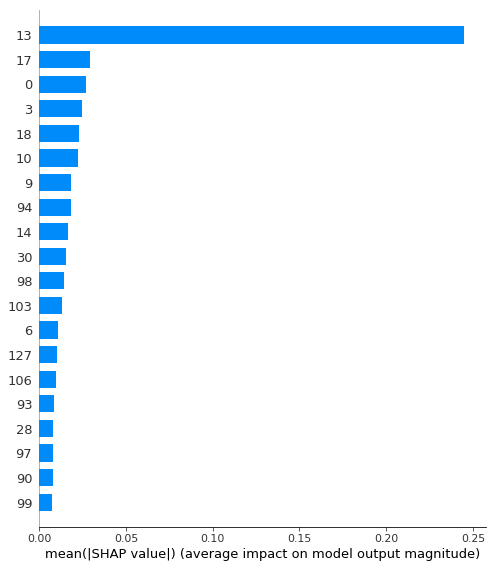

In [31]:
shap.summary_plot(shap_values, X, plot_type="bar")